In [1]:
import numpy as np
import seaborn as sns
import pickle
import warnings
import matplotlib.pyplot as plt

In [2]:
def suppressWarnings():
    warnings.simplefilter("ignore")

In [3]:
with open('ps1.pkl', 'rb') as file:
    data = pickle.load(file)

In [4]:
data.head()

,vx,vy,vz,R2,p
0,-0.129486,-0.378220,-1.303648,0.159817,1.462786
1,0.855369,0.378654,2.219246,0.875035,3.138316
2,-0.391171,0.782003,-1.747694,0.764544,0.564914
3,-0.533835,1.830559,-1.869053,3.635927,1.814512
4,-1.001277,-0.443638,-6.325631,1.199371,0.855995


In [5]:
data.dtypes

vx    float64
vy    float64
vz    float64
R2    float64
p     float64
dtype: object

In [6]:
data.describe()

,vx,vy,vz,R2,p
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.001624,0.011467,0.012268,1.972555,0.991419
std,1.001303,0.984991,10.061490,2.207145,1.031325
min,-3.444211,-4.372958,-38.613684,0.000152,0.000083
25%,-0.663989,-0.668262,-6.716978,0.502088,0.273442
50%,0.004381,0.014887,0.096389,1.238110,0.664234
75%,0.662433,0.682803,6.698072,2.648618,1.352410
max,3.460661,3.270417,37.832599,28.426626,9.915629


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vx      5000 non-null   float64
 1   vy      5000 non-null   float64
 2   vz      5000 non-null   float64
 3   R2      5000 non-null   float64
 4   p       5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


## Question 1a

Pairplot of dataset.

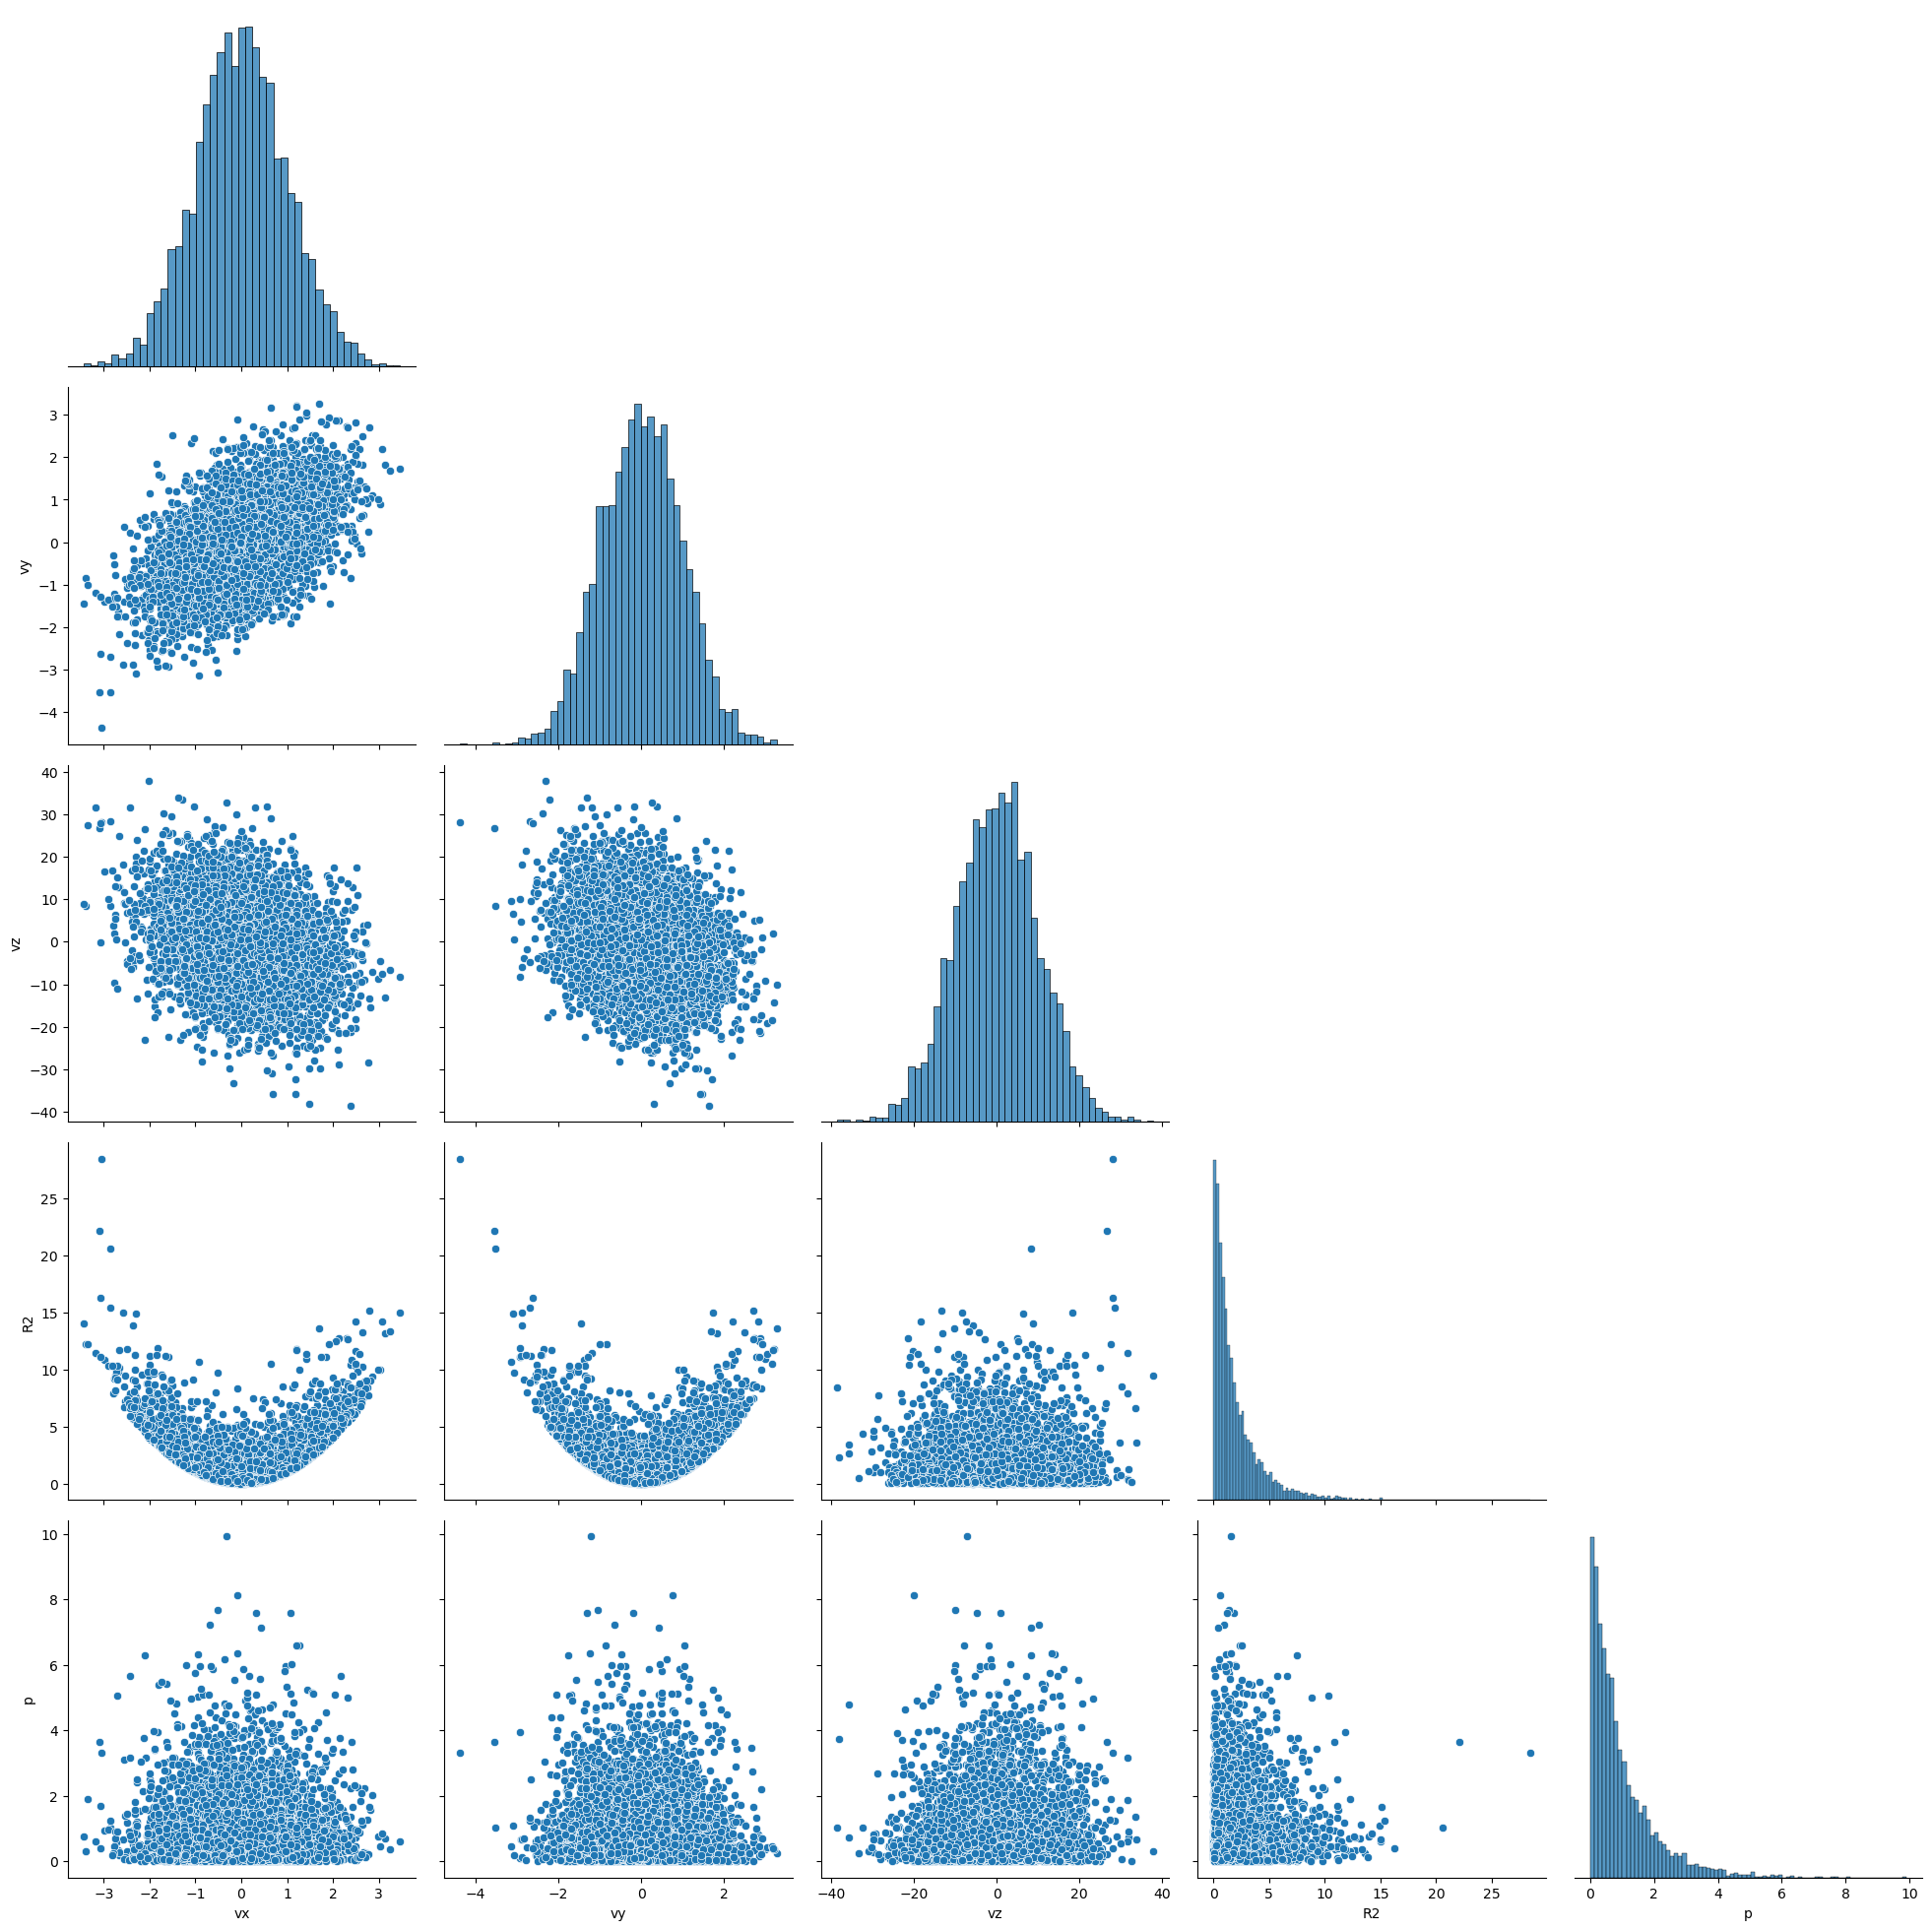

In [8]:
warnings.simplefilter("ignore")

# sns.pairplot(data) 

g = sns.PairGrid(data, 
                 diag_sharey = False, 
                 corner = True,
                 aspect=1.0,
                 height=4
                )
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

## Question 1b

Publication quality pairplot of `vx` and `vz`

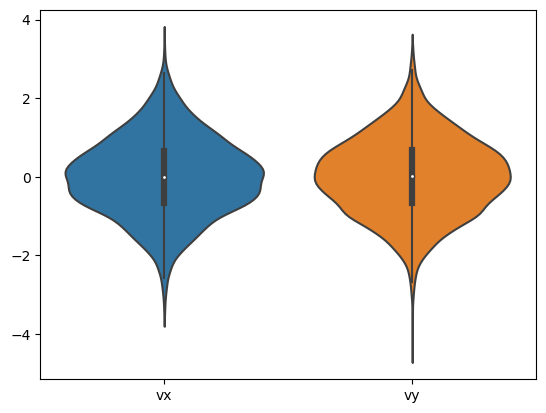

In [9]:
violinplot = sns.violinplot(data[["vx", "vy"]],
#                             data=data,
#                             x="vx",
#                             y="vy",
                            violinmode='overlay'
                           )
# displot.set_axis_labels('Datapoint Number', 'Value', fontsize=16)


## Question 1c

Corrolation and covariance matricese with a consistent heatmap function

In [10]:
def customHeatmap(data):
    # Hide the top triangle
    mask = np.triu(np.ones_like(data, dtype=bool))
    
    f, ax = plt.subplots(figsize=(6, 6))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data, 
                mask=mask, 
                cmap=cmap, 
                center=0, 
                annot=True,
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}
               )

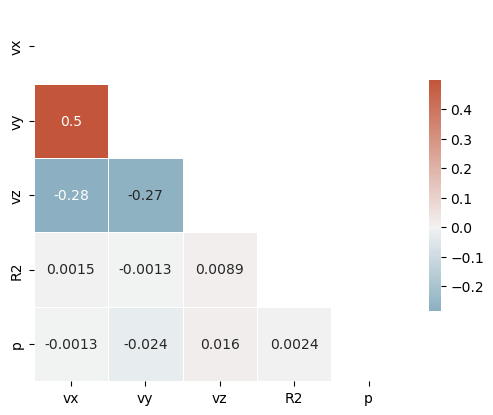

In [11]:
corrolation = data.corr()
customHeatmap(corrolation)

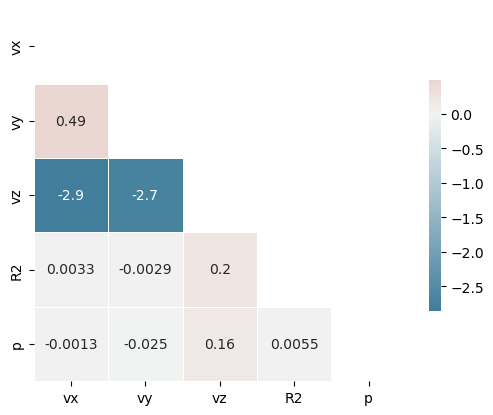

In [12]:
covariance = data.cov()
customHeatmap(covariance)